#### 1. 주식 +-7% or +-8% 데이터 찾기

In [4]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta

In [13]:
def getData(code,dateStart,dateEnd):
    df = fdr.DataReader(code,dateStart,dateEnd)
    return df

kakao_code = '035720'

In [18]:
for i in range(1,6):
    start_date = f"202{i}-01-01"
    end_date = f"202{i}-06-30"
    temp = df.loc[start_date:end_date]
    

<class 'matplotlib.figure.Figure'>
Figure(1200x700)

<class 'list'>
[<Axes: ylabel='Price'>, <Axes: >, <Axes: ylabel='Volume  $10^{6}$'>, <Axes: >]
4


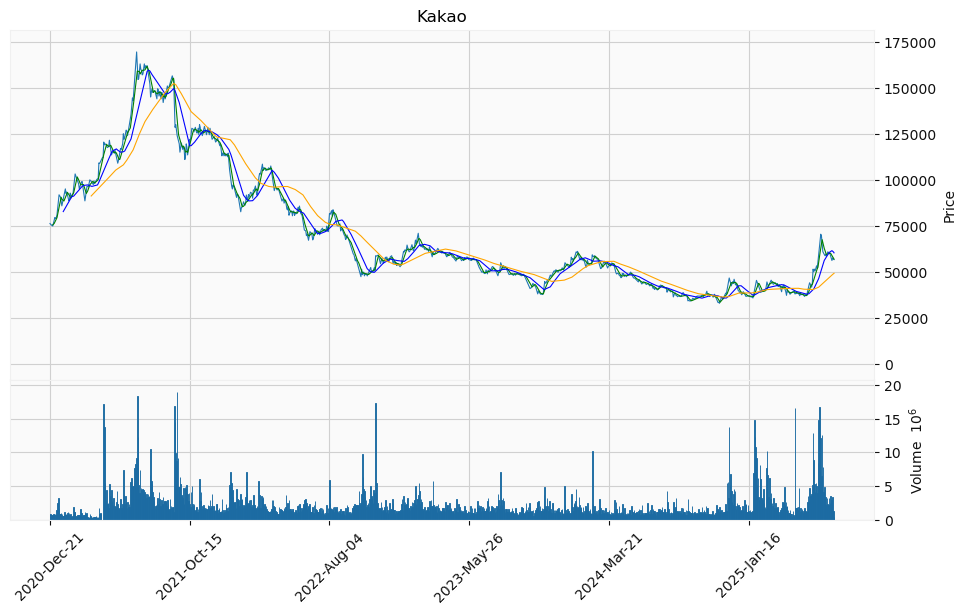

In [20]:
date_end = datetime.today().date()

date_start = date_end - timedelta(days=1673)

df = getData(code, date_start, date_end)
df
chart_style = 'yahoo'


marketcolors = mpf.make_marketcolors(up='red', down='blue')

mpf_style = mpf.make_mpf_style(base_mpf_style=chart_style, marketcolors=marketcolors)

fig, ax = mpf.plot(
    data = df,
    type = 'line',
    style = mpf_style,      
    figsize = (12,7),    
    fontscale = 1.0,         
    mav = (5, 20, 60),       
    mavcolors = ('green','blue','orange'), 
    returnfig = True,       
    volume = True          
)

print(type(fig))
print(fig)     
print()
print(type(ax))
print(ax)
print(len(ax))

ax[0].set_title('Kakao')                 
ax[1].set_title('-Date-')                                      

plt.show()

In [8]:
import mplfinance as mpf
import matplotlib.pyplot as plt

<class 'matplotlib.figure.Figure'>
Figure(1200x700)

<class 'list'>
[<Axes: ylabel='Price'>, <Axes: >, <Axes: ylabel='Volume  $10^{6}$'>, <Axes: >]
4


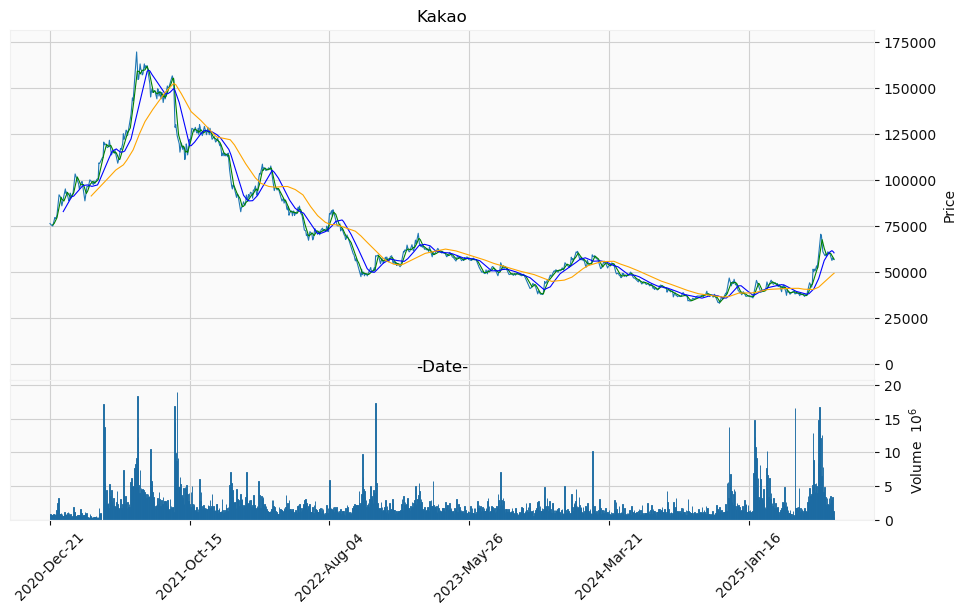

In [11]:
chart_style = 'yahoo'


marketcolors = mpf.make_marketcolors(up='red', down='blue')

mpf_style = mpf.make_mpf_style(base_mpf_style=chart_style, marketcolors=marketcolors)

fig, ax = mpf.plot(
    data = df,
    type = 'line',
    style = mpf_style,      
    figsize = (12,7),    
    fontscale = 1.0,         
    mav = (5, 20, 60),       
    mavcolors = ('green','blue','orange'), 
    returnfig = True,       
    volume = True          
)

print(type(fig))
print(fig)     
print()
print(type(ax))
print(ax)
print(len(ax))

ax[0].set_title('Kakao')                 
ax[2].set_title('-Date-')                                      

plt.show()

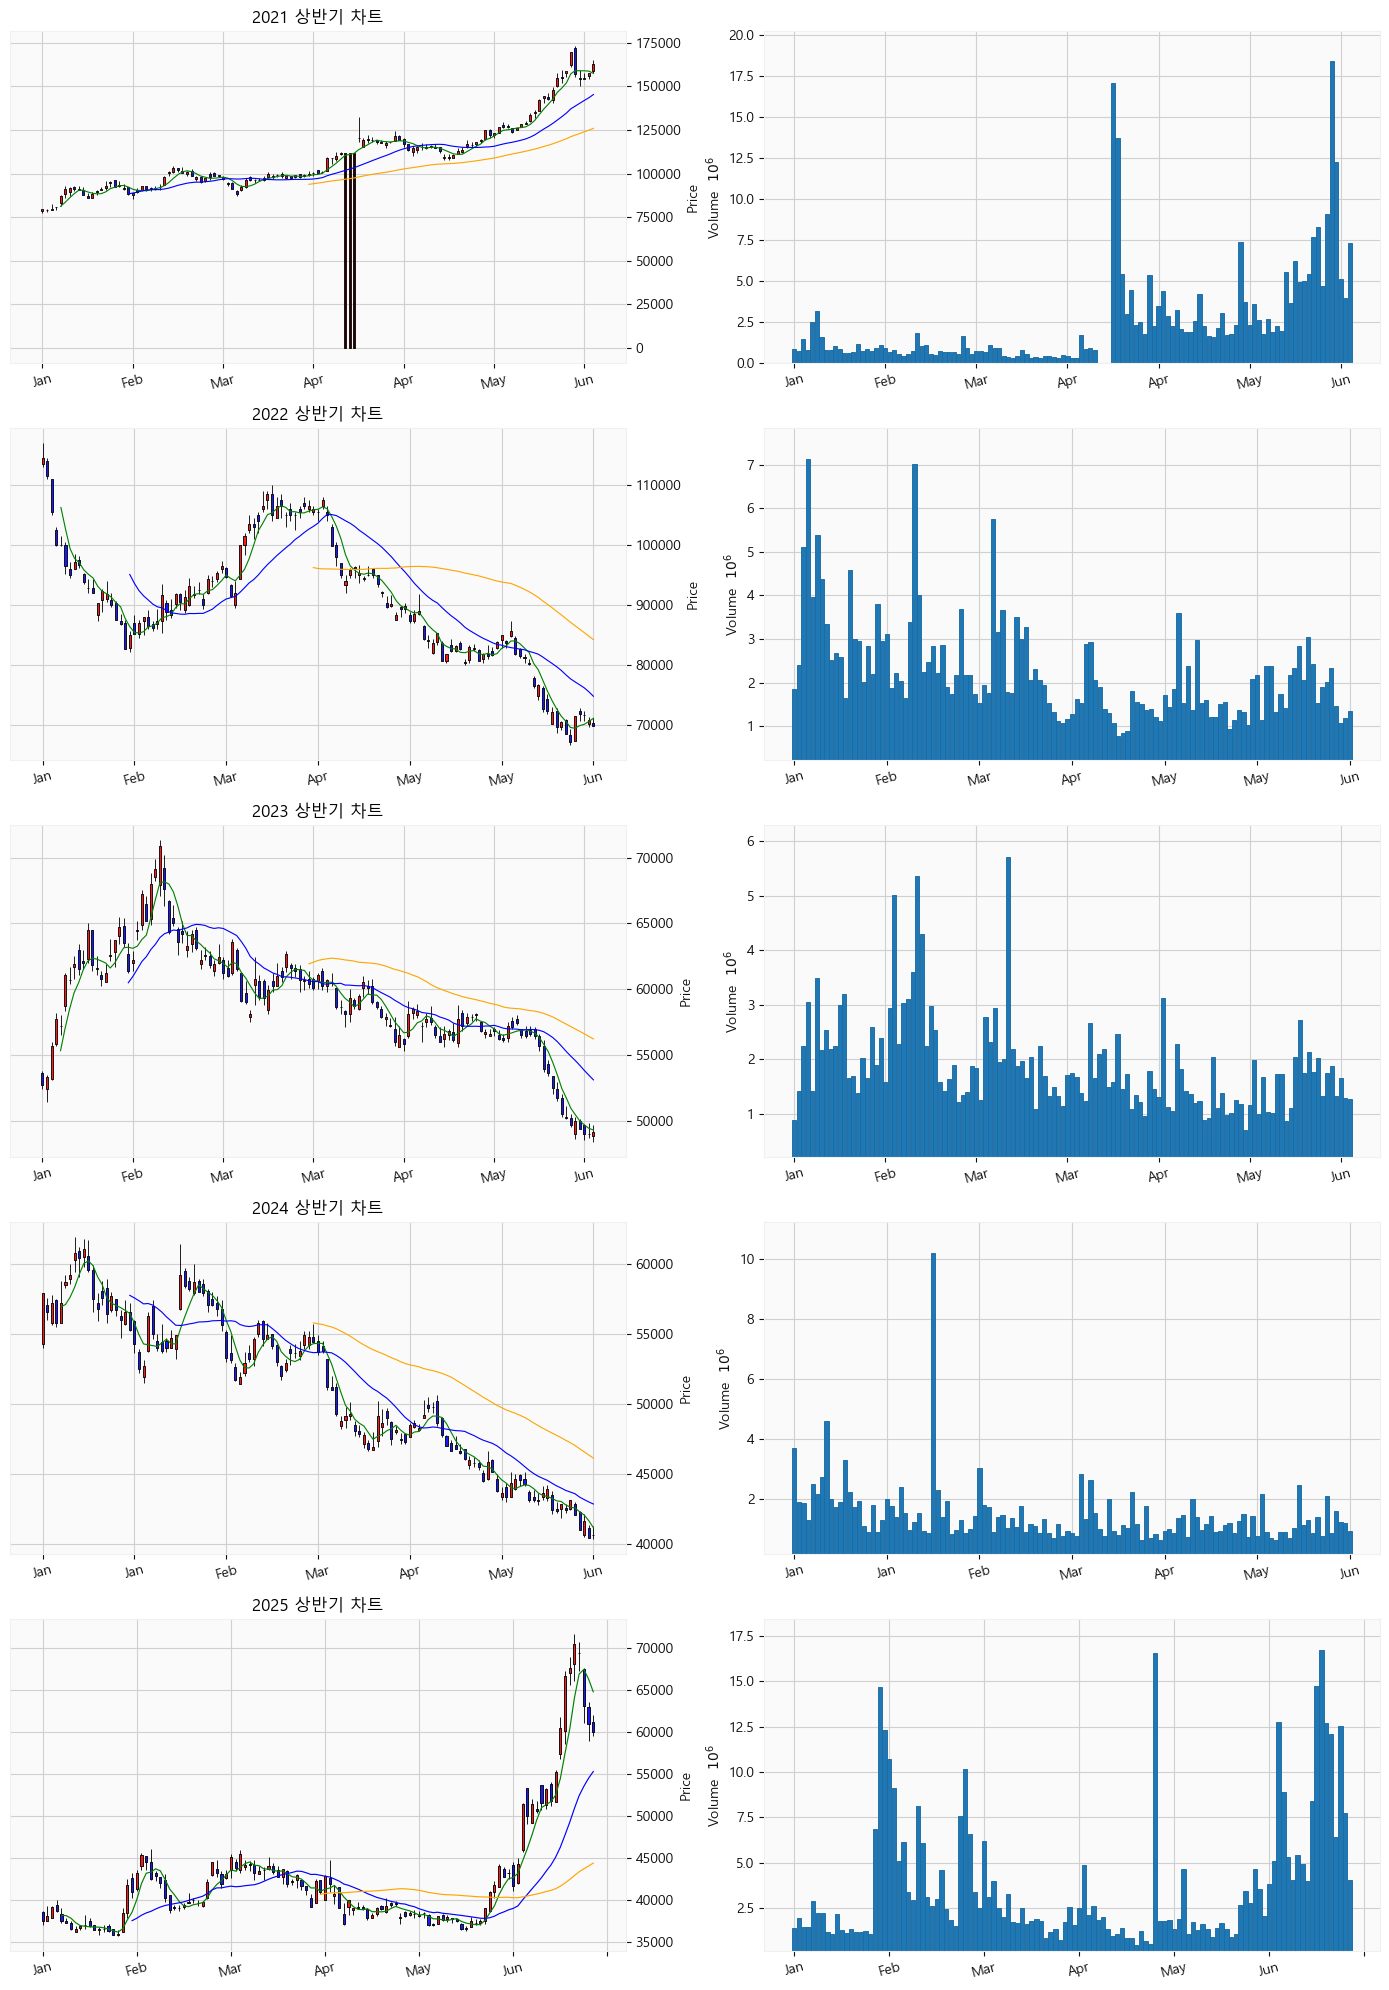

In [21]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
# 예시용 데이터프레임 df는 DateTimeIndex로 되어 있어야 합니다.
# df = ... (OHLCV 데이터)
# 한글 폰트 설정 (Windows: 맑은 고딕, Mac: AppleGothic)
mpl.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)
# 각 subplot은 (price, volume) 한 쌍이므로 2개씩 할당
for i in range(5):
    year = f"202{i+1}"
    start_date = f"{year}-01-01"
    end_date = f"{year}-06-30"
    temp = df.loc[start_date:end_date]
    chart_style = 'yahoo'
    marketcolors = mpf.make_marketcolors(up='red', down='blue')
    mpf_style = mpf.make_mpf_style(base_mpf_style=chart_style, marketcolors=marketcolors)
    # 가격 plot과 거래량 plot의 ax를 따로 할당
    ax_price = axs[i][0]
    ax_volume = axs[i][1]
    # subplot에 개별 차트 그리기
    mpf.plot(
        data=temp,
        type='candle',
        style=mpf_style,
        ax=ax_price,
        volume=ax_volume,
        mav=(5, 20, 60),
        mavcolors=('green', 'blue', 'orange'),
        datetime_format='%b',
        xrotation=15
    )
    ax_price.set_title(f"{year} 상반기 차트")
plt.tight_layout()
plt.show()

In [22]:
import FinanceDataReader as fdr
import pandas as pd
# 1. 카카오 주가 데이터 불러오기
df = fdr.DataReader('035720', '2021-01-01', '2025-06-30')
# 2. 전일 대비 등락률 계산 (전일 종가 기준)
df['Change(%)'] = df['Close'].pct_change() * 100
# 3. ±7% 이상 변동한 날 필터링
df_7 = df[(df['Change(%)'] >= 7) | (df['Change(%)'] <= -7)]
# 4. ±8% 이상 변동한 날 필터링
df_8 = df[(df['Change(%)'] >= 8) | (df['Change(%)'] <= -8)]
# 결과 보기
print("±7% 이상 등락한 날:")
print(df_7[['Close', 'Change(%)']])
print("\n±8% 이상 등락한 날:")
print(df_8[['Close', 'Change(%)']])

±7% 이상 등락한 날:
             Close  Change(%)
Date                         
2021-01-08   87111   7.826657
2021-04-06  109189   8.366498
2021-04-15  120500   7.589286
2021-06-24  157000  -7.374631
2021-09-08  138500 -10.064935
2021-09-09  128500  -7.220217
2022-03-10  100000   8.577633
2022-08-04   81700   7.500000
2022-10-07   50900  -7.116788
2022-10-14   51400   8.668076
2022-11-11   58700  15.551181
2023-08-01   54900   7.017544
2023-11-03   41300   7.133593
2023-11-06   44700   8.232446
2024-02-15   59200   7.832423
2024-08-05   36300  -8.217446
2024-12-04   46600   8.498254
2025-01-31   38350   7.272727
2025-02-03   41800   8.996089
2025-04-01   42200   7.928389
2025-04-10   40000   7.671602
2025-06-09   51400  16.027088
2025-06-19   60400   9.420290
2025-06-20   66600  10.264901
2025-06-26   63100  -9.077810

±8% 이상 등락한 날:
             Close  Change(%)
Date                         
2021-04-06  109189   8.366498
2021-09-08  138500 -10.064935
2022-03-10  100000   8.577633
2022-10-14 

#### 2. 뉴스 제목 크롤링

In [29]:
mask = df_7['Change(%)'] > 0
mask

Date
2021-01-08     True
2021-04-06     True
2021-04-15     True
2021-06-24    False
2021-09-08    False
2021-09-09    False
2022-03-10     True
2022-08-04     True
2022-10-07    False
2022-10-14     True
2022-11-11     True
2023-08-01     True
2023-11-03     True
2023-11-06     True
2024-02-15     True
2024-08-05    False
2024-12-04     True
2025-01-31     True
2025-02-03     True
2025-04-01     True
2025-04-10     True
2025-06-09     True
2025-06-19     True
2025-06-20     True
2025-06-26    False
Name: Change(%), dtype: bool

In [28]:
list(map(str,df_7[mask].index))       # map(적용함수, 명령)

['2021-01-08 00:00:00',
 '2021-04-06 00:00:00',
 '2021-04-15 00:00:00',
 '2022-03-10 00:00:00',
 '2022-08-04 00:00:00',
 '2022-10-14 00:00:00',
 '2022-11-11 00:00:00',
 '2023-08-01 00:00:00',
 '2023-11-03 00:00:00',
 '2023-11-06 00:00:00',
 '2024-02-15 00:00:00',
 '2024-12-04 00:00:00',
 '2025-01-31 00:00:00',
 '2025-02-03 00:00:00',
 '2025-04-01 00:00:00',
 '2025-04-10 00:00:00',
 '2025-06-09 00:00:00',
 '2025-06-19 00:00:00',
 '2025-06-20 00:00:00']

In [30]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm import tqdm
import time
from datetime import timedelta
import pandas as pd

In [31]:
driver = wb.Chrome()
dates = df_7[df_7['Change(%)'] > 0].index.to_list()
query = '카카오'
res = []
try:
    for date in tqdm(dates):
        # 하루 전 ~ 하루 후 범위로 설정 (옵션)
        start_date = date - timedelta(days=1)
        end_date = date + timedelta(days=1)
        # MM/DD/YYYY 포맷으로 변환
        start_date_str = start_date.strftime("%m/%d/%Y")
        end_date_str = end_date.strftime("%m/%d/%Y")
        # 검색어 쿼리
        query = "카카오"
        for start in range(0,100,10):
        # 뉴스 검색 URL 생성
            try:
                url = (
                    f"https://www.google.com/search?"
                    f"q={query}&tbm=nws&tbs=cdr:1,cd_min:{start_date_str},cd_max:{end_date_str}"
                    f"&start={start}"
                )
                driver.get(url)
                articles = [' '.join(x.text.split()) for x in driver.find_elements(By.CSS_SELECTOR,'.WlydOe')]
                res.extend(articles)
            except:
                print(date,start,'에러')
except:
    print('에러')
driver.quit()
res

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [02:33<00:00,  8.10s/it]


["더스쿠프 네이버 vs 카카오 이커머스 전투 “우리 플랫폼으로 들어와 들어와” 여기에 '톡스토어(쇼핑하기·장보기)', 공동주문 서비스 '메이커스'까지 합치면 거래액은 훨씬 커진다. 코로나 수혜를 입은 카카오커머스는 2020년 3분기 전체 거래액이... . 2021. 1. 8.",
 '한겨레 비대면 올라탄 빅데이터…네이버·카카오 ‘구조적 성장’ 페달 네이버와 카카오의 지난해 실적 개선세는 놀라운 수준이다. 네이버의 1~3분기 누적 매출은 3조8천억원으로 지난해 같은 기간에 견줘 19.3% 늘었다. 카카오도 같은 기간... . 2021. 1. 7.',
 '더미션 카카오를 직거래를 통해 수입하고 가공하여 부가가치가 높은 식품을 만드는 기업, 카카오패밀리 #열 번째 팀 카카오를 직거래를 통해 수입하고 가공하여 부가가치가 높은 식품을 만드는 기업, 카카오패밀리 #열 번째 팀 · 글자크기 · 농부들과의 직거래, 지속적인 거래를 통하여... . 2021. 1. 7.',
 'AI타임스 ‘카카오엔터프라이즈’ 출범 1년 만에 1000억 투자 유치 산업은행 역대 최대 규모 스케일업 투자 사례 사전기술평가서 최상위 등급 받아. AI 기반 플랫폼 서비스 △카카오워크 △카카오i 클라우드(예정) 운영 주당 7만 3165원에... . 2021. 1. 7.',
 "한국경제 카카오페이지, 불법 웹툰사이트 상대 저작권 침해 손배소 승소 카카오페이지, 불법 웹툰사이트 상대 저작권 침해 손배소 승소 ... 카카오페이지는 웹툰 유통 사이트 '어른아이닷컴'을 상대로 한 저작권 침해 1심 소송에서 승소했다고 7일... . 2021. 1. 7.",
 '플래텀(Platum) 직방, 카카오페이 자회사 아파트 앱 ‘모빌’ 인수 직방이 아파트 입주민 편의를 위한 주거관리 서비스를 강화하기 위해 카카오페이와 손을 잡았다. . 2021. 1. 8.',
 "Chosunbiz [단독] 충전 필요 없는 카카오페이 교통카드 나온다 - 조선비즈 지금은 선불카드 방식으로, '카카오페이머니'를 충전해야 교통카드 이용이 가능하

In [ ]:
def search(date,start):
    res = []
    start_date = date - timedelta(days=1)
    end_date = date + timedelta(days=1)
    start_date_str = start_date.strftime("%m/%d/%Y")
    end_date_str = end_date.strftime("%m/%d/%Y")
    for s in range(start,300,10):
        try:
            reacp_form = driver.find_element(By.CSS_SELECTOR,'#captcha-form')
            return {
                'state' : False,
                'date' : date,
                'start' : s,
                'result' : res
            }
        except:
            try:
                url = (
                    f"https://www.google.com/search?"
                    f"q={query}&tbm=nws&tbs=cdr:1,cd_min:{start_date_str},cd_max:{end_date_str}"
                    f"&start={s}"
                )
                driver.get(url)
                articles = [' '.join(x.text.split()) for x in driver.find_elements(By.CSS_SELECTOR,'.WlydOe')]
                res.extend(articles)
            except:
                print(date,start,'에러')
                break
    return {
        'state' : True,
        'result' : res
    }


driver = wb.Chrome()
query = '카카오'
res = []
try:
    for date in tqdm(dates):
        start = 0
        while True:
            search_data = search(date,start)
            res.extend(search_data['result'])
            if search_data['state']:
                break
            else:
                driver.quit()
                start = search_data['start']
                driver = wb.Chrome()
except:
    print('에러')
driver.quit()
res

  0%|                                                                                           | 0/19 [00:25<?, ?it/s]

에러


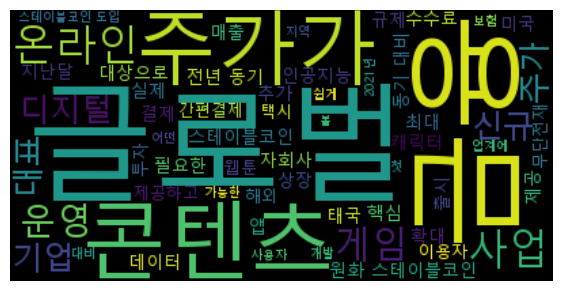

In [86]:
c

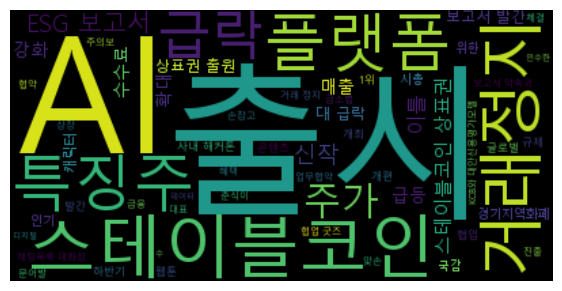

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as datapd

df = datapd.read_csv("data/article_decrease_results.csv", encoding='utf-8')

# '제목' 열의 모든 텍스트를 하나로 합치고, '카카오'가 들어간 단어는 제거
text = " ".join(df['제목'].astype(str))
filtered_words = [word for word in text.split() if '카카오' not in word and '있' not in word and '를' not in word and '을' not in word and '배포' not in word and '는' not in word and '이다' not in word and '했다' not in word and '며' not in word and '은' not in word and '일' not in word and '월' not in word]
filtered_text = " ".join(filtered_words)

# 불용어 리스트
stopwords = set(["은", "는", "이", "가", "을", "를", "에", "의", "와", "과", "도", "로", "으로", "에서", "에게",
                 "까지", "보다", "만큼", "처럼", "하며", "그러나", "그리고", "등", "등등", "대한", "또", "또다시", "다시",
                 "등등의", "위해", "위해서", "하기", "하여", "함께", "함께한", "함께하는", "있다", "없다", "되다", "되었다",
                 "되자", "되면서", "되며", "했다", "한다", "시작", "시작했다", "시작한", "열린", "공개", "도입", "진행", "실시",
                 "제공", "발표", "돌파", "발표된", "선보여", "추가", "가능", "가능해", "생겼다", "개시", "참여", "연다", "만든",
                 "만든다", "카카오", "네이버", "카카오톡", "카카오뱅크", "카카오페이", "카카오게임즈", "카카오엔터", "카카오모빌리티",
                 "카카오페이지", "카카오프렌즈", "카카오브레인", "카카오스타일", "다음", "카톡", "라인", "페이", "카뱅", "카겜",
                 "SM", "티맵", "SK", "판교", "네이트", "네이트뉴스", "뉴스", "중", "첫", "새", "것", "오류", "v", "이유", "'", "방지", "vs",
                 "인베스트조선", "메시지", "카카오엔터프라이즈", "기사본문", "방지'", "카카오페이증권", "전자문서", "작년", "서비스", "스포", "이어",
                 "단독", "만에",'후'])


wc = WordCloud(
    font_path=r"C:\Windows\Fonts\Malgun.ttf",
    background_color="black",
    max_words=60,
    random_state=99,
    stopwords=stopwords
)

wc.generate(filtered_text)

plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('article_decrease_contents.png', bbox_inches='tight', pad_inches=0)
plt.show()
